<h1 align=center><font size = 5> Make Fake Album Cover Game</font></h1>


The goal is to create randomly generated album covers with tile mentioned on top of the randomly gener:



#### Import libraries 


In [19]:
from IPython.display import Image as IPythonImage
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

#### Helper function to superimpose text on image 


In [20]:
def display_cover(top,bottom ):
    """This fucntoin
    """
    import requests
    
    name='album_art_raw.png'
    # Now let's make get an album cover.
    # https://picsum.photos/ is a free service that offers random images.
    # Let's get a random image:
    album_art_raw = requests.get('https://picsum.photos/500/500/?random')
    # and save it as 'album_art_raw.png'
    with open(name,'wb') as album_art_raw_file:
       album_art_raw_file.write(album_art_raw.content)
    # Now that we have our raw image, let's open it 
    # and write our band and album name on it
    img = Image.open("album_art_raw.png")
    draw = ImageDraw.Draw(img)

    # We'll choose a font for our band and album title, 
    # run "% ls /usr/share/fonts/truetype/dejavu" in a cell to see what else is available,
    # or download your own .ttf fonts!
    band_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 25) #25pt font
    album_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20) # 20pt font

    # the x,y coordinates for where our album name and band name text will start
    # counted from the top left of the picture (in pixels)
    band_x, band_y = 50, 50
    album_x, album_y = 50, 400

    # Our text should be visible on any image. A good way
    # of accomplishing that is to use white text with a 
    # black border. We'll use the technique shown here to draw the border:
    # https://mail.python.org/pipermail/image-sig/2009-May/005681.html
    outline_color ="black"

    draw.text((band_x-1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x-1, band_y+1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y+1), top, font=band_name_font, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x-1, album_y+1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y+1), bottom , font=album_name_font, fill=outline_color)

    draw.text((band_x,band_y),top,(255,255,255),font=band_name_font)
    draw.text((album_x, album_y),bottom,(255,255,255),font=album_name_font)

    return img

## Part 1: Use of function display_cover <a id='ref1'></a>

 The function **display_cover**  selects a random image from https://picsum.photos/  and will help us superimpose two strings over the image. The parameter **top** is the string we would like to superimpose on the top of an image.  The parameter bottom is the string we would like to display on the bottom of the image.  The function does not return the image but returns an object of type  Image from the Pillow library; the object represents a PIL image. 

In [21]:
img=display_cover(top='top',bottom='bottom')

To save the image, use the method **save** . The argument is the file  name of the image  we would like to save in this case 'sample-out.png'

In [22]:
img.save('sample-out.png')

Finely  use **IPythonImage** to read the image file and display the results.


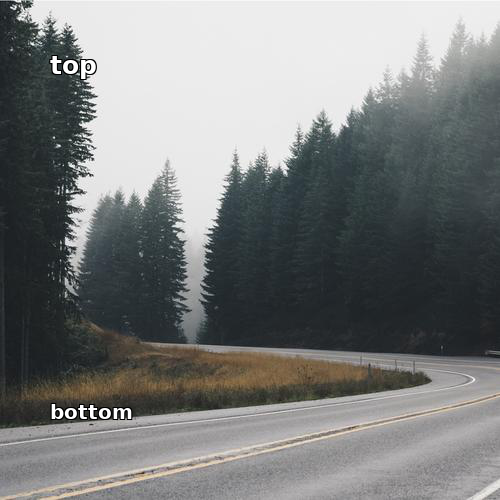

In [23]:
IPythonImage(filename='sample-out.png')

Using the **display_cover** function to display the image with the name Python on the top and Data Science on the bottom. Also saving the image as **'sample-out.png'**.

In [24]:
img=display_cover(top='Python',bottom='Data Science')

In [25]:
img.save('sample-out.png')

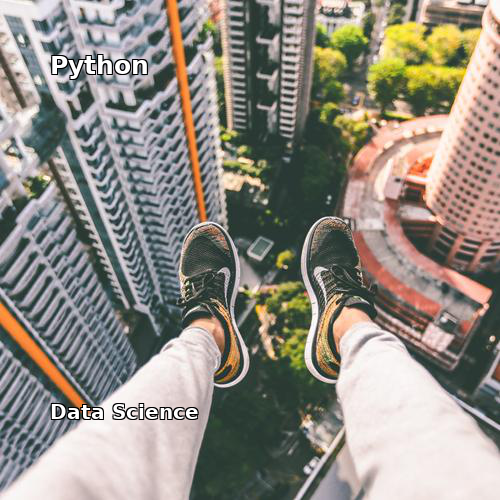

In [26]:
IPythonImage(filename='sample-out.png')

## Part 2: Loading a random page from Wikipedia  <a id='ref2'></a>

 In this project, I will use the request library, I have already used it in the function **display_cover**, but still importing the library in the next cell.

In [27]:
import requests

 The following is the URL to the  page 

In [28]:
wikipedia_link='https://en.wikipedia.org/wiki/Special:Random'

 Using the function **get** from the **requests** library to download the Wikipedia page using the **wikipedia_link** as an argument. Assigning the object to the variable **raw_random_wikipedia_page**.

In [29]:
raw_random_wikipedia_page = requests.get('https://en.wikipedia.org/wiki/Special:Random')

 Use the data attribute **text** to extract the XML as a text file a string and assign the result variable **page**:

In [30]:
page = (raw_random_wikipedia_page.text)
print(page)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Vino de Pago - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Vino_de_Pago","wgTitle":"Vino de Pago","wgCurRevisionId":902647522,"wgRevisionId":902647522,"wgArticleId":37394044,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Spanish wine","Appellations","Wine classification"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May"

# Part 3: Extracting the Title of the Article <a id='ref3'></a>  

Use the title of the Wikipedia article as the title of the band. The title of the article is surrounded by the XML node title as follows:  **&lt;title&gt;title - Wikipedia&lt;/title>**
. For example, if the title of the article was Python we would see the following:  **&lt;title&gt;Python - Wikipedia&lt;/title>**.  The first step is to find the XML node  **&lt;title&gt;** and **&lt;/title&gt;**indicating the start and end of the title. The string function  **find** maybe helpful, you can also use libraries like **xlxml**.

In [31]:
import re
a = page.find('<title>')
a=a+7
b = page.find('</title>')
page_new = page[a:b]
band_title = re.sub(' - Wikipedia', '', page_new)
print(band_title)

Vino de Pago


Repeating the second and third step, to extract the title of a second Wikipedia article but use the result to **album_title**

In [32]:
import re
raw_random_wikipedia_page = requests.get('https://en.wikipedia.org/wiki/Special:Random')
page = (raw_random_wikipedia_page.text)
a = page.find('<title>')
a=a+7
b = page.find('</title>')
page_new = page[a:b]
album_title = re.sub(' - Wikipedia', '', page_new)
print(album_title)


Baron Tyrawley


In [33]:
print("Your band: ", band_title)
print("Your album: ", album_title)

Your band:  Vino de Pago
Your album:  Baron Tyrawley


## Part 4: Displaying the Album Cover  <a id='ref4'></a>

Using the function **display_cover** to superimpose the band and album title over a random image, assigning the result to the variable **album_cover **.

In [34]:
img=display_cover(top=band_title,bottom=album_title)

 Use the method save to save the image as **sample-out.png**:

In [35]:
img.save('sample-out.png')

Use the function **IPythonImage** to display the image 


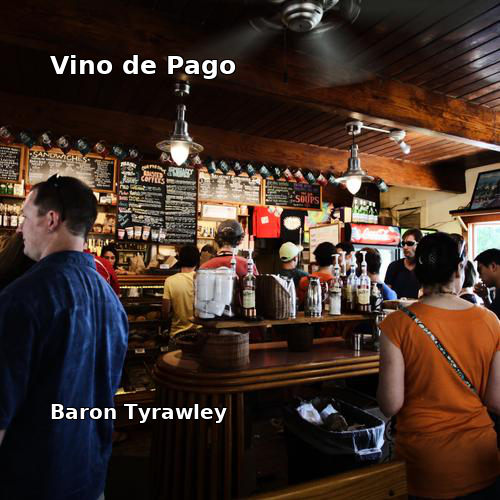

In [36]:
IPythonImage(filename='sample-out.png')